In [1]:
import cv2

img = cv2.imread('../photo/original.JPG')
#print(img.shape)
im_resized = cv2.resize(img, dsize=None, fx=0.1, fy=0.1)
#print(im_resized.shape)
cv2.imwrite('../photo/opencv_0.1.jpg', im_resized, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

True

In [2]:
im_resized = cv2.resize(img, dsize=None, fx=1.3, fy=1.3)
print(im_resized.shape)
cv2.imwrite('../photo/opencv_1.3.jpg', im_resized, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

(1602, 2392, 3)


True

In [3]:
#高さを定義
height = img.shape[0]                         
#幅を定義
width = img.shape[1]  
#回転の中心を指定                          
center = (int(width/2), int(height/2))
#回転角を指定
angle = 90.0
#スケールを指定
scale = 1.0
#getRotationMatrix2D関数を使用
trans = cv2.getRotationMatrix2D(center, angle , scale)
#アフィン変換
image2 = cv2.warpAffine(img, trans, (width,height))
print(image2.shape)
cv2.imwrite('../photo/opencv_rotation90.jpg', image2, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

(1232, 1840, 3)


True

In [4]:
print(img.flatten())

[208 174 144 ... 122 104  87]


In [5]:
img2=cv2.imread('../photo/original1.JPG')

In [6]:
# ２値化
def binarization(img):
    a,img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return img


In [7]:
# 差分を数値化
def getDiff(img1, img2):
    # グレースケール変換
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    # ２値化
    bi = binarization(img1)
    return img1,img2,bi # 白の要素数

In [8]:
gray1,gray2,binari=getDiff(img,img2)
cv2.imwrite('../photo/opencv_gray1.jpg', gray1, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imwrite('../photo/opencv_gray2.jpg', gray2, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
cv2.imwrite('../photo/opencv_binari.jpg', binari,[int(cv2.IMWRITE_JPEG_QUALITY), 100])

True

In [9]:
gray_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mask = cv2.absdiff(gray_img1, gray_img2)
# ２値化
a,img4 = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(a)
cv2.imwrite('../photo/opencv_difference.jpg', img4,[int(cv2.IMWRITE_JPEG_QUALITY), 100])

0.0


True

In [10]:
ma1=cv2.imread('../photo/ma1.png')
ma2=cv2.imread('../photo/ma2.png')
print(ma1.shape,ma2.shape)

(547, 562, 3) (548, 562, 3)


In [11]:

dim=(548,562)
ma1=cv2.resize(ma1, dim, interpolation = cv2.INTER_AREA)
ma2=cv2.resize(ma2, dim, interpolation = cv2.INTER_AREA)
gray_img1 = cv2.cvtColor(ma1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(ma2, cv2.COLOR_BGR2GRAY)
mask = cv2.absdiff(gray_img1, gray_img2)

# ２値化
a,img4 = cv2.threshold(mask, 144, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(a)
cv2.imwrite('../photo/opencv_difference.jpg', img4,[int(cv2.IMWRITE_JPEG_QUALITY), 100])


45.0


True

In [28]:
import cv2
from IPython.display import Image, display


def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

In [13]:
# OBR 特徴検出器を作成する。
detector = cv2.ORB_create()

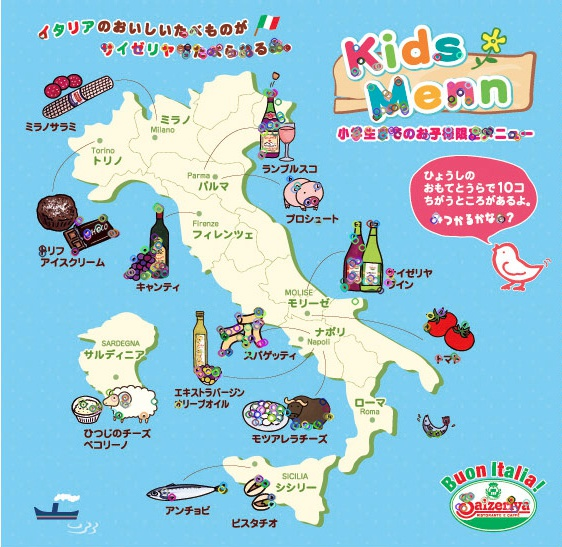

In [14]:
# 画像を読み込む。
img = cv2.imread("../photo/ma1.png")

# 特徴点を検出する。
kp = detector.detect(img)

# 特徴点を描画する。
dst = cv2.drawKeypoints(img, kp, None)
imshow(dst)

In [15]:
# 各特徴点の特徴量記述子を計算する。
kp, desc = detector.compute(img, kp)
print(len(kp), desc.shape)

500 (500, 32)


In [16]:
# 特徴点を検出する。
kp, desc = detector.detectAndCompute(img, None)
print(len(kp), desc.shape)

500 (500, 32)


In [17]:
# 画像を読み込む。
img1 = cv2.imread("../photo/ma1.png")
img2 = cv2.imread("../photo/ma2.png")

# 特徴点及び特徴量記述子を検出する。
kp1, desc1 = detector.detectAndCompute(img1, None)
kp2, desc2 = detector.detectAndCompute(img2, None)

In [18]:
# マッチング器を作成する。
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# マッチングを行う。
matches = bf.match(desc1, desc2)
print(len(matches))

500


In [19]:
m = matches[0]

print(f"distance: {m.distance}, trainIdx: {m.trainIdx}, queryIdx: {m.queryIdx}")

distance: 77.0, trainIdx: 205, queryIdx: 0


In [20]:
# 特徴点の対応関係
query_pt, train_pt = kp1[m.queryIdx], kp2[m.trainIdx]
# 特徴量記述子の対応関係
query_desc, train_desc = desc1[m.queryIdx], desc2[m.trainIdx]

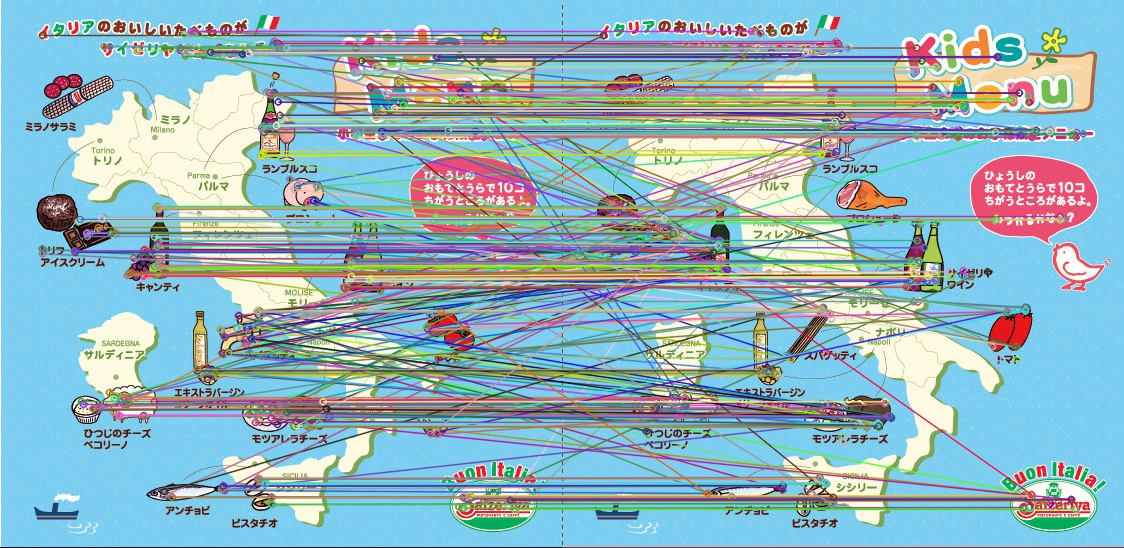

In [21]:
# マッチング結果を描画する。
dst = cv2.drawMatches(img1, kp1, img2, kp2, matches, None)
imshow(dst)

In [22]:
matches = bf.knnMatch(desc1, desc2, k=2)

In [23]:
m = matches[0]
print(m)

for n in m:
    # 特徴点の対応関係
    query_pt, train_pts = kp1[n.queryIdx], kp2[n.trainIdx]
    # 特徴量記述子の対応関係
    query_desc, train_desc = desc1[n.queryIdx], desc2[n.trainIdx]

    print(f"distance: {n.distance}, trainIdx: {n.trainIdx}, queryIdx: {n.queryIdx}")

[<DMatch 0x7f5b2e26fbb0>, <DMatch 0x7f5b2e26fb10>]
distance: 77.0, trainIdx: 205, queryIdx: 0
distance: 78.0, trainIdx: 187, queryIdx: 0


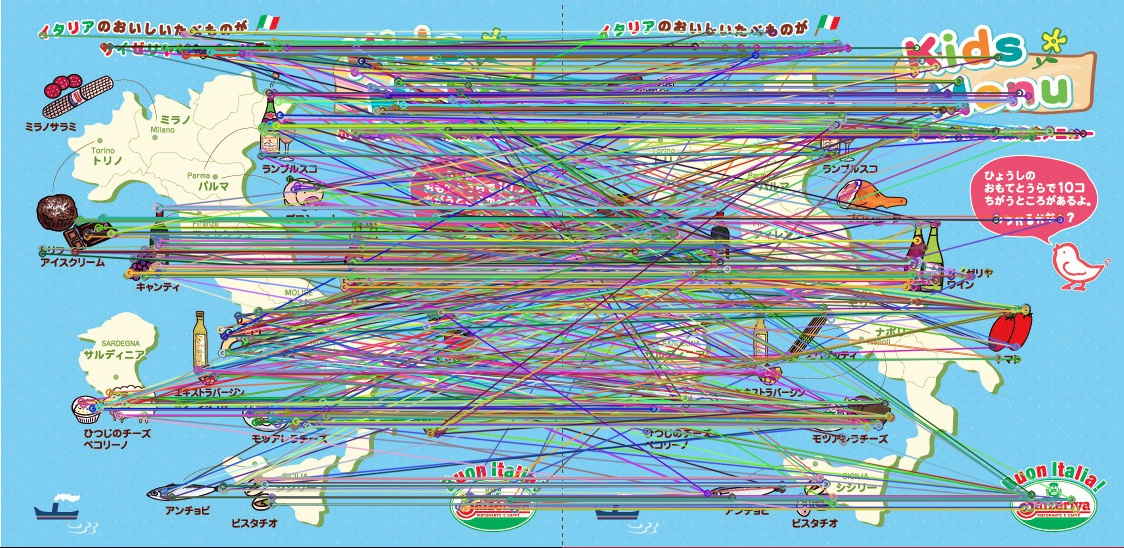

In [24]:
# マッチング結果を描画する。
dst = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None)
imshow(dst)

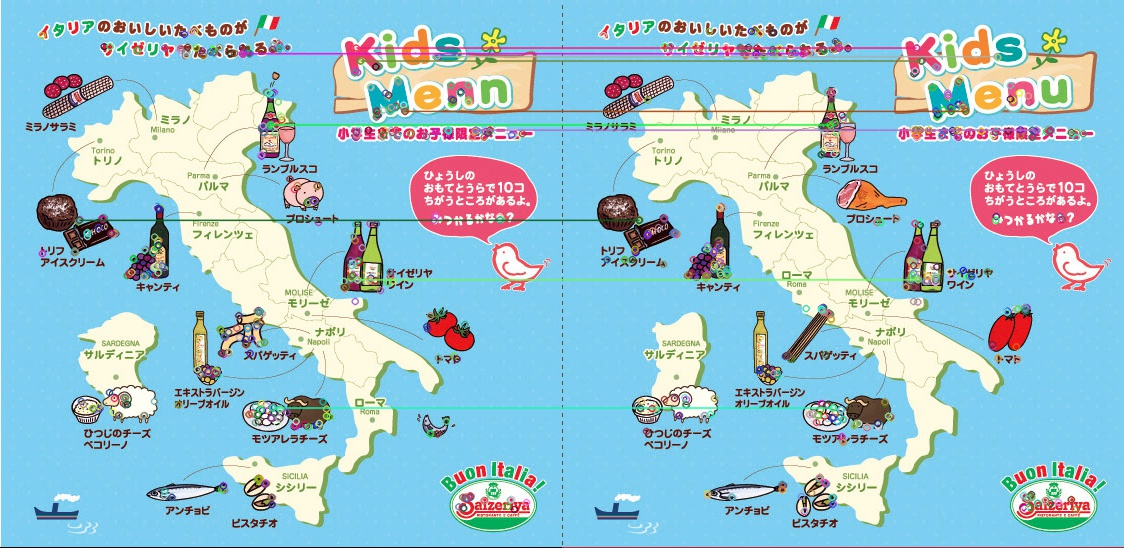

In [29]:
import cv2


# OBR 特徴量検出器を作成する。
detector = cv2.ORB_create()

# 特徴点を検出する。
kp1, desc1 = detector.detectAndCompute(img1, None)
kp2, desc2 = detector.detectAndCompute(img2, None)

# マッチング器を作成する。
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# マッチングを行う。
matches = bf.match(desc1, desc2)

# matchesをdescriptorsのdistance順(似ている順)にsortする 
matches = sorted(matches, key = lambda x:x.distance)
        
# マッチング結果を描画する。
dst = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None)
imshow(dst)

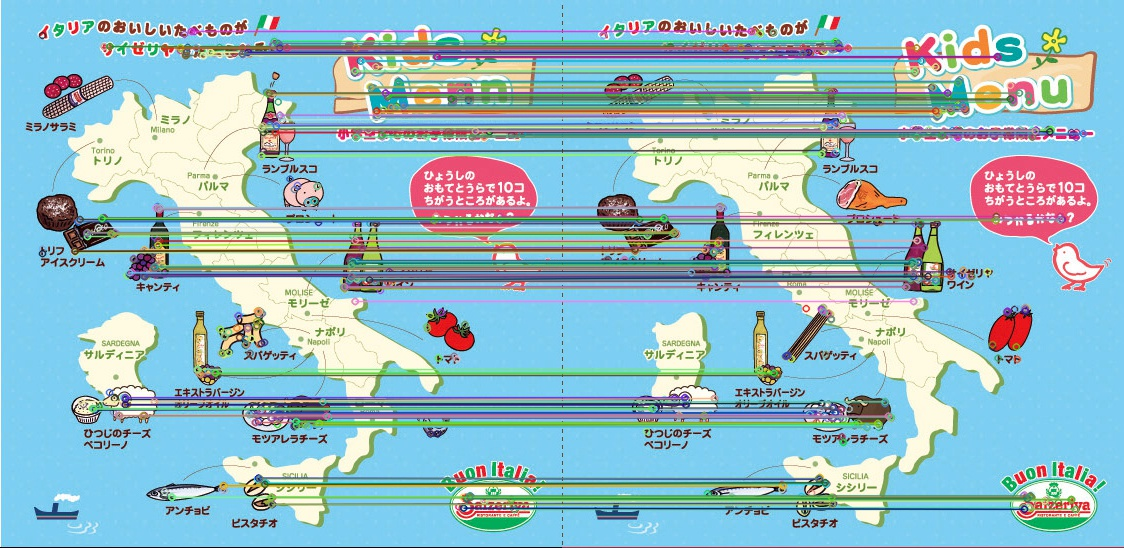

In [26]:
# OBR 特徴量検出器を作成する。
detector = cv2.ORB_create()

# 特徴点を検出する。
kp1, desc1 = detector.detectAndCompute(img1, None)
kp2, desc2 = detector.detectAndCompute(img2, None)

# マッチング器を作成する。
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# マッチングを行う。
matches = bf.knnMatch(desc1, desc2, k=2)

# レシオテストを行う。
good_matches = []
thresh = 0.7
for first, second in matches:
    if first.distance < second.distance * thresh:
        good_matches.append(first)
        
# マッチング結果を描画する。
dst = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
imshow(dst)

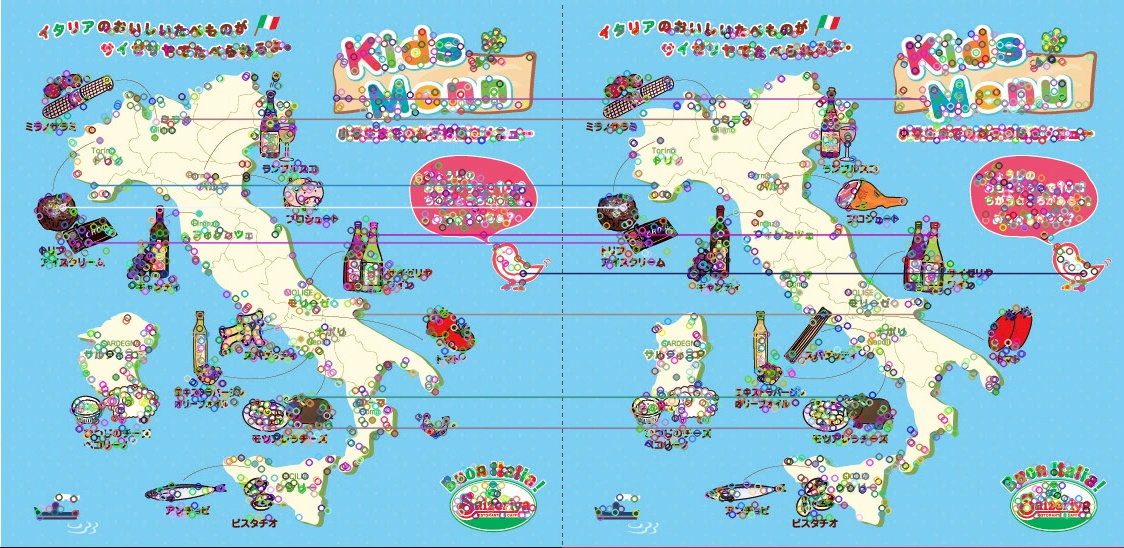

In [32]:
# 画像を読み込む。
img1 = cv2.imread("../photo/ma1.png")
img2 = cv2.imread("../photo/ma2.png")

# 特徴量検出器
detector = cv2.AKAZE_create()

# 特徴点及び特徴量記述子を検出する。
kp1, desc1 = detector.detectAndCompute(img1, None)
kp2, desc2 = detector.detectAndCompute(img2, None)

# マッチング器を作成する。
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# マッチングを行う。
matches = bf.match(desc1, desc2)

# matchesをdescriptorsのdistance順(似ている順)にsortする 
matches = sorted(matches, key = lambda x:x.distance)
        
# マッチング結果を描画する。
dst = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None)
imshow(dst)

In [ ]:
cv2.imwrite('../photo/AKAZE_cro')